In [1]:
###The following code was used to create UpSet plots from our non-gap-
###filled data. Similar to other UpSet plot code.
###First, loading packages
import pandas as pd
from upsetplot import from_contents
from upsetplot import UpSet
from matplotlib import pyplot as plt
from upsetplot import generate_counts

In [2]:
###Reading in our data, which is visualized below. Each population
###group is a column and the cells contain metabolite feature IDs that
###are present in each group.
df=pd.read_csv("CoreMetabolome_ClusterIndexList_grouped_Populations.csv", encoding='latin-1')
df.head()

,Norman,Guayabo,TamboDeMora,Boulkiemdé,Tunapuco,Matses
0,42617,42617.0,17157.0,42617.0,42617.0,17157.0
1,26575,17157.0,43803.0,43803.0,26575.0,43803.0
2,43803,43803.0,292.0,292.0,17157.0,292.0
3,25815,292.0,25815.0,43789.0,43803.0,23116.0
4,292,43789.0,43789.0,2003.0,292.0,43789.0


In [3]:
###Reading in the file as a list
lists_of_filename=["CoreMetabolome_ClusterIndexList_grouped_Populations.csv"]

In [4]:
###Making list of titles
list_of_types=["Populations"]

In [5]:
###Creating counter for loop
counter=0

In [6]:
###Running loop for all files. The "encoding='latin-1'" part is necessary
###for this file due to formatting as csv and column names
for file in lists_of_filename:
    df = pd.read_csv(file, encoding='latin-1')

In [7]:
###Making input lists, which will also drop any NAs and duplicates.
###Columns are also then made into a list.
Norman=df['Norman'].dropna().drop_duplicates().tolist()
Guayabo=df['Guayabo'].dropna().drop_duplicates().tolist()
TamboDeMora=df['TamboDeMora'].dropna().drop_duplicates().tolist()
Boulkiemdé=df['Boulkiemdé'].dropna().drop_duplicates().tolist()
Tunapuco=df['Tunapuco'].dropna().drop_duplicates().tolist()
Matses=df['Matses'].dropna().drop_duplicates().tolist()

In [8]:
###Making a dictionary from the lists and combined dataset
populations= from_contents({'Norman':Norman, 
                            'Guayabo': Guayabo, 
                            'TamboDeMora': TamboDeMora,
                           'Boulkiemdé': Boulkiemdé,
                           'Tunapuco': Tunapuco,
                           'Matses': Matses})

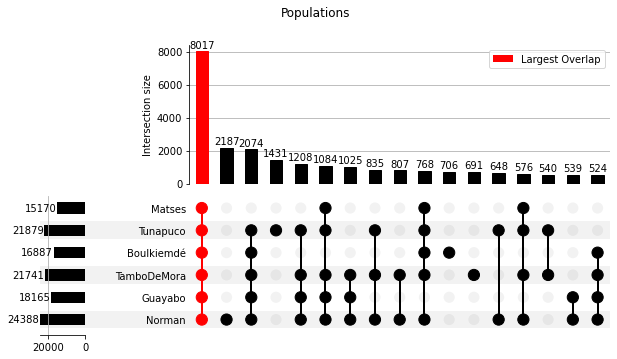

In [9]:
###Parameters for UpSet plot, then plotting and saving
###The number of shown groupings can be edited with "min_subset_size"
###Similarly, the colors and highlighting the largest overlap can be tailored
upset_plt=UpSet(populations, sort_categories_by=None, sort_by='cardinality',
               min_subset_size=500, facecolor='black', other_dots_color=0.05,
               shading_color=0.05, with_lines=True, element_size=32, show_counts=True,
               show_percentages=False)
upset_plt.style_subsets(min_subset_size=6000, label="Largest Overlap", facecolor="red")
upset_plt.plot()
plt.suptitle(list_of_types[counter])
plt.savefig(list_of_types[counter]+"_upset_population.jpeg",
           bbox_inches="tight")